In [12]:
import numpy as np
import pandas as pd

In [57]:

global_temp = pd.read_csv("GlobalTemperatures.csv")
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum())

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

In [58]:
print('data shape: ',df.shape)
print('columns: ',df.columns)
print('info: ',df.info())

data shape:  (1992, 10)
columns:  Index(['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'data', 'Month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1850 to 2015
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   LandAverageTemperature                     1992 non-null   float64       
 1   LandAverageTemperatureUncertainty          1992 non-null   float64       
 2   LandMaxTemperature                         1992 non-null   float64       
 3   LandMaxTemperatureUncertainty              1992 non-null   float64       
 4   LandMinTemperature                         1992 non-nul

In [59]:
print('null values:\n', df.isnull().sum())

null values:
 LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
data                                         0
Month                                        0
dtype: int64


In [60]:
def converttemp(x):
        x = (x * 1.8) + 32
        return float(x)

In [61]:
def wrangle(df):
    df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
    df["LandAverageTemperature"] = df["LandAverageTemperature"].apply(converttemp)
    df["LandMaxTemperature"] = df["LandMaxTemperature"].apply(converttemp)
    df["LandMinTemperature"] = df["LandMinTemperature"].apply(converttemp)
    df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].apply(converttemp)

    df["dt"] = pd.to_datetime(df["dt"])
    df["Month"] = df["dt"].dt.month
    df["Year"] = df["dt"].dt.year

    df = df.drop("dt", axis=1)
    df = df.drop("Month", axis=1)

    df = df[df.Year >= 1850]
    df = df.set_index("Year")
    df = df.dropna()

    return df


In [62]:
global_temp = wrangle(global_temp)
print(global_temp.head())

      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                   
1850                 33.3482             46.8356             26.2292   
1850                 37.5278             49.9460             27.8762   
1850                 40.9172             50.6246             28.5710   
1850                 44.9906             55.2812             33.8324   
1850                 50.0072             60.1790             38.8598   

      LandAndOceanAverageTemperature  
Year                                  
1850                         55.0994  
1850                         56.4584  
1850                         57.2774  
1850                         58.4006  
1850                         59.9126  


In [63]:
#check for null values
print(global_temp.isnull().sum())

LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64


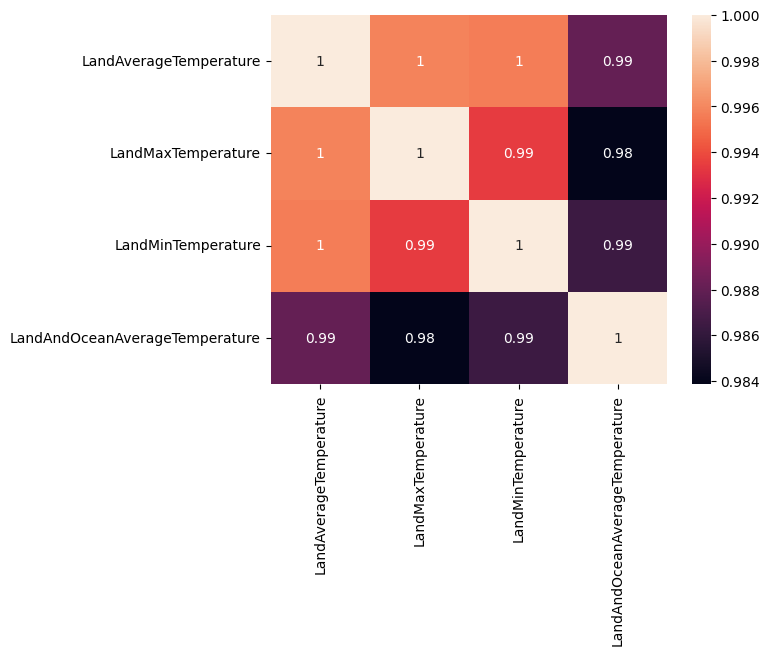

In [64]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = global_temp.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

In [66]:
# separating features and target variable
target = 'LandAndOceanAverageTemperature'
y = global_temp[target]
x = global_temp[['LandAverageTemperature','LandMaxTemperature','LandMinTemperature']]

In [67]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_val shape: ', x_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)

x_train shape:  (1494, 3)
x_val shape:  (498, 3)
y_train shape:  (1494,)
y_val shape:  (498,)


In [69]:
from sklearn.metrics import mean_squared_error
y_pred = [y_train.mean()] * len(y_train)
print('Baseline RMSE: ', round(mean_squared_error(y_train, y_pred),5))

Baseline RMSE:  5.29374


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Training model to predict 
forest = make_pipeline(
    SelectKBest(k='all'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100,
                          max_depth=50,
                          random_state=77,
                          n_jobs=-1)
    )
forest.fit(x_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_jobs=-1,
                                       random_state=77))])

In [84]:
# Model Evaluation of Machine Learning model to Predict Weather
y_pred_val = forest.predict(x_val)  # Generate predictions for the validation set
error = y_pred_val - y_val
mape = 100 * (error/y_train)
accuracy = 100 - np.mean(mape)
print("Random Forest Model: ", accuracy, "%")

Random Forest Model:  99.99853913658482 %
